Title: "Project1: Understanding TIPPING"

Author: "Prince Birring, Fei Teng & Alicia Romero" 

Date: "September 8, 2016"

### Abstract.

This study explores the variables that affect tipping behavior applying the steps of a Data Science project. The scope of the work only includes the first two stages: Stating the question and the Exploratory analysis. For this work we found a data set created by a food server back in 1990, where he was able to record tips and several features of the business. Using Python we analyzed the data and observed interesting operational patterns that influence tipping, at this stage of the project, "party size" and "gender" are one of the most influential factors in tipping. As a recommendation we proposed to fit a linear regression model to properly measure and find a predictable model.


### Overview.

Tipping is not mandatory in the USA, but it is expected in many sit down establishments. Many people that work as waiters and waitresses at restaurants, rely on this gratuity to enhance their monthly salary. The amount paid varies from state to state, and some of them allow the employer to use what is called the "tip-credit" (credit against its minimum wage obligation to the employee). For that reason, some of these workers can make 2.13 dollars an hour far less than 7.25 dollars which is the US Federal minimum wage. Additionally to the benefits for the employee, the employer can some extend measure customer satisfaction. 

Typically the average tip is between 15% to 20% of the total price of the meal.Many factors contribute with the tip size, to name a few: type of restaurant, location and atmosphere. But there are others, inherent to the business like party size, gender, amount of the bill, etc., that might also impact the amount received. We would like to explore what are these variables and how they interrelate.

### Question.

What are the factors that affect tipping?


### Tools used.

For this study we used the data set: "tips" provided by Peter Bryant in his book "Practical Data Analysis: Case Studies in Business Statistics". We also used Python for the programming, Markdown for the elaboration of the report and Prezi to come up with the presentation.

link dataset: https://vincentarelbundock.github.io/Rdatasets/datasets.html

### Dataset.

We first load the libraries to use:

In [2]:
#Importing Modules
import pandas as pd
import os
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats
#Show the graph below commands
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Read the file "tips.csv"

In [3]:
os.getcwd()
os.chdir("c:\\users\\princ\\Downloads\\Projects")
open('tips.csv', 'r').readlines()[:10]

['total_bill,tip,sex,smoker,day,time,size\n',
 '16.99,1.01,Female,No,Sun,Dinner,2\n',
 '10.34,1.66,Male,No,Sun,Dinner,3\n',
 '21.01,3.5,Male,No,Sun,Dinner,3\n',
 '23.68,3.31,Male,No,Sun,Dinner,2\n',
 '24.59,3.61,Female,No,Sun,Dinner,4\n',
 '25.29,4.71,Male,No,Sun,Dinner,4\n',
 '8.77,2,Male,No,Sun,Dinner,2\n',
 '26.88,3.12,Male,No,Sun,Dinner,4\n',
 '15.04,1.96,Male,No,Sun,Dinner,2\n']

In [4]:
tips = pd.read_csv('tips.csv')

In [14]:
tips.shape

(244, 7)

In [15]:
tips.head(n=10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [16]:
tips.tail(n=10)

,total_bill,tip,sex,smoker,day,time,size
234,15.53,3.00,Male,Yes,Sat,Dinner,2
235,10.07,1.25,Male,No,Sat,Dinner,2
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2



As we can see, "tips" is a dataset compose of 7 variables and 244 observations. 


### Types of variables:

We'll take a closer look at the types of the 7 variables contained within the file.


In [17]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.4+ KB


So the data available is:

* x, numeric integer.  Works as a correlative for the number of observations (rows).
* total_bill: numeric continuous. Total bill amount in dollars, including tax.
* tip: numeric continuous. Tip amount in dollars (our dependent variable and element of study)
* sex: nominal-categorical. Sex of the person that is paying for the bill (1 = Female, 2 = Male).
* smoker: nominal-categorical. Whether is there a smoker in the party (0 = Yes, 1 = No).
* day: nominal-categorical. Day of the week (3 = Sunday, 4 = Saturday, 5 = Thursday, 6 = Friday)
* time: nominal-categorical.Time of the day (0 = Dinner, 1 = Lunch)
* size: numeric integer (it can be treated as categorical because it has few values). Size of the party.

After analyzing them, we decided to:
1. Relabel ordinal variables do give them a natural ordering.
sex: nominal-categorical. Sex of the person that is paying for the bill (1 = Male, 2 = Female). smoker: nominal-categorical. Whether is there a smoker in the party (0 = No, 1 = Yes).
day: nominal-categorical. Day of the week (3 = Thursday, 4 = Friday, 5 = Saturday, 6 = Sunday). time: nominal-categorical.Time of the day (1 = Lunch, 2 = Dinner).
2. Create and add a new variable to our dataset that captures the relation between “tip” and “tota_bill”, we’ll call it “tip_rate”. The reason of doing this is because after all, tips are calculated as a percentage of the total bill.
3. Delete the first column “x” which has no added value for our study.

In [29]:
tips_rate1=tips.total_bill/tips.tip
tips_rate=tips_rate1*100

At this point, we also validate the numeric variables for  the reasonableness of their values:

In [18]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


They all seem to have a reasonable range of values.


### Check for data completeness.

We will check if is there any missing data which could cause serious problems in our observations and future conclusions.


### Exploratory data analysis.


We have structure our analysis as follows: 


1. Univariate quantitative variables: bill_amount, tips and tip_rate. 
For them we'll calculate:

  a) The mean, media and mode for quantitative variable to find out if the sampled values are concentrated around certain value
  
  b) Standard deviation and variance to measure the amount of dispersion (spread) of their set of values.
  
  c) Histogram and density plot to have a feeling of their distribution.


In [19]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


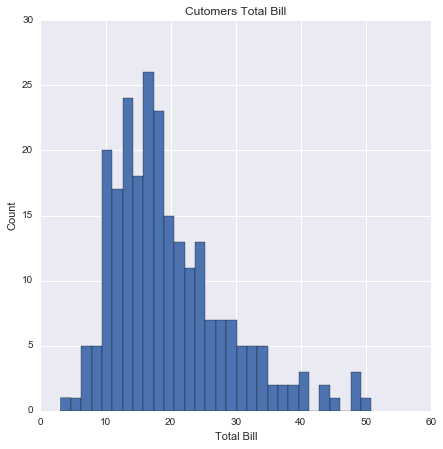

In [20]:
tips['total_bill'].plot(kind='hist', figsize=(7,7), bins=30)
plt.title('Cutomers Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Count')
plt.show()

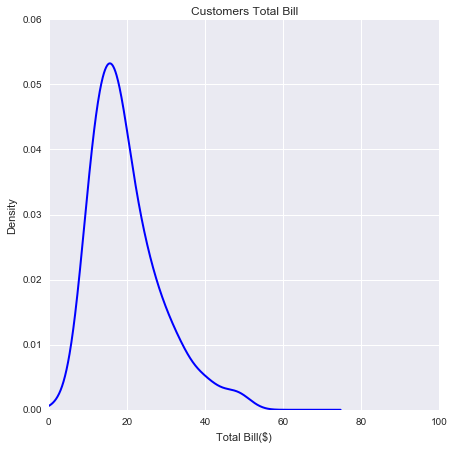

In [21]:
tips['total_bill'].plot(kind='density', figsize=(7,7), xlim=(0, 100), color='blue', linewidth=2)
plt.xlabel('Total Bill($)')
plt.title('Customers Total Bill')
plt.show()

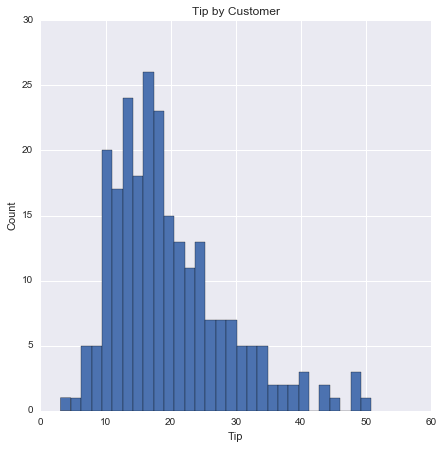

In [22]:
tips['total_bill'].plot(kind='hist', figsize=(7,7), bins=30)
plt.title('Tip by Customer')
plt.xlabel('Tip')
plt.ylabel('Count')
plt.show()

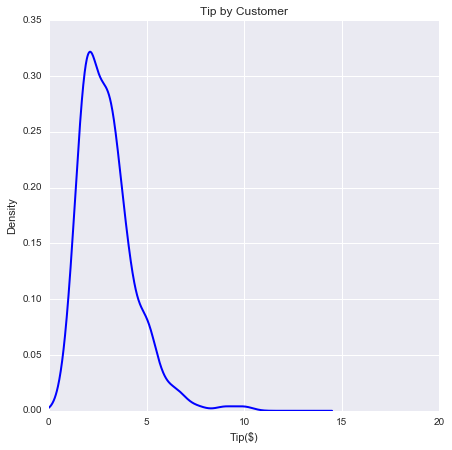

In [23]:
tips['tip'].plot(kind='density', figsize=(7,7), xlim=(0, 20), color='blue', linewidth=2)
plt.xlabel('Tip($)')
plt.title('Tip by Customer')
plt.show()

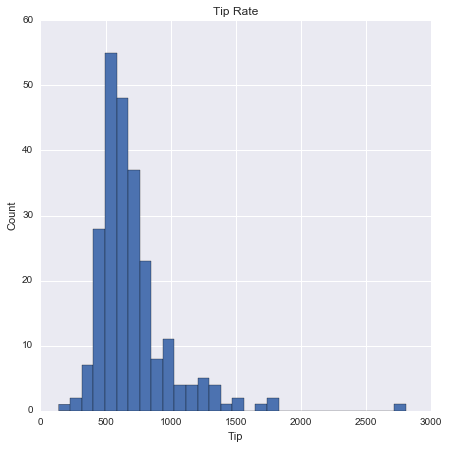

In [25]:
tips_rate.plot(kind='hist', figsize=(7,7), bins=30)
plt.title('Tip Rate')
plt.xlabel('Tip Rate')
plt.ylabel('Count')
plt.show()

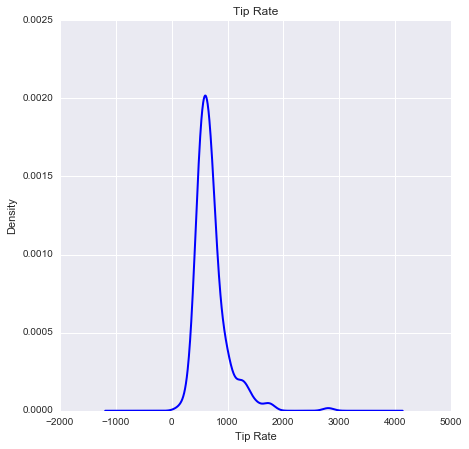

In [28]:
tips_rate.plot(kind='density', figsize=(7,7), color='blue', linewidth=2)
plt.xlabel('Tip Rate')
plt.title('Tip Rate')
plt.show()

The average bill is 19.78 dollars, the average tip is 3.00 dollars and the average tip rate is 16.08%. Their mode is at their maximun peak, that would be 13.48 dollars for total bill, 2.00 dollars for tips and 14.48% fro tip rate. For all of them their mode is less than their median, and their median is smaller than their mean; this is typical of right skewed distributions. We confirm this by looking at their histograms and density plots, they show the presence of some big bill amounts, tips and tip rates in the data (outliers).

2.. Univariate categorical variables: sex, smoke, time, days and party size.

      For them we'll calculate:

       a) Frequency table to understand the distribution of each category. 
     
       b) Bar chart as visualization tool.

Gender distribution:

In [16]:
tips.groupby('sex').count()

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Female,87,87,87,87,87,87
Male,157,157,157,157,157,157


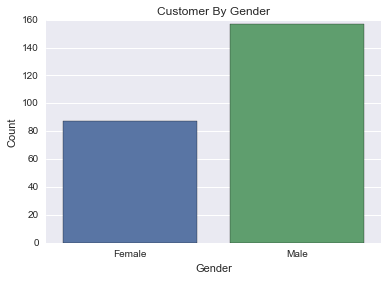

In [17]:
sns.countplot(x='sex', data=tips).set(title='Customer By Gender', xlabel='Gender', ylabel='Count')
pylab.show()

We can see that man tend to pay more bills and tips than women (thank God).

Smoker population distribution:

In [18]:
tips.groupby('smoker').count()

,total_bill,tip,sex,day,time,size
smoker,,,,,,
No,151,151,151,151,151,151
Yes,93,93,93,93,93,93


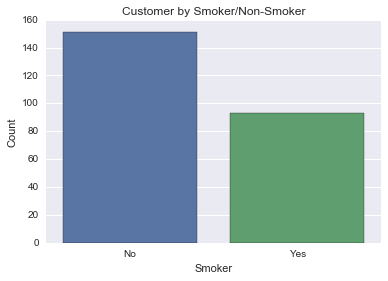

In [19]:
sns.countplot(x="smoker", data=tips).set(title="Customer by Smoker/Non-Smoker", xlabel="Smoker",ylabel="Count")
pylab.show()

This establishment is visited more by non smokers customers than smokers (thank God again).

Weekly activity distribution:

In [20]:
tips.groupby('day').count()

,total_bill,tip,sex,smoker,time,size
day,,,,,,
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76
Thur,62,62,62,62,62,62


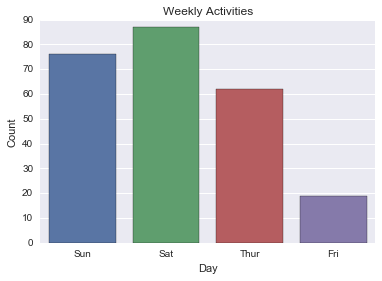

In [21]:
sns.countplot(x="day", data=tips).set(title="Weekly Activities", xlabel="Day",ylabel="Count")
pylab.show()

The busiest days of the week are weekends, specially Saturdays.

Dinning services distribution:

In [22]:
tips.groupby('time').count()

,total_bill,tip,sex,smoker,day,size
time,,,,,,
Dinner,176,176,176,176,176,176
Lunch,68,68,68,68,68,68


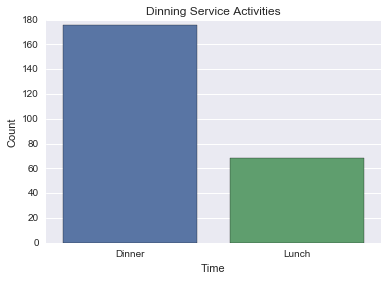

In [23]:
sns.countplot(x="time", data=tips).set(title="Dinning Service Activities", xlabel="Time",ylabel="Count")
pylab.show()

Customers come more for dinner than for lunch.

Party size distribution:

In [30]:
tips.groupby('size').count()

,total_bill,tip,sex,smoker,day,time
size,,,,,,
1,4,4,4,4,4,4
2,156,156,156,156,156,156
3,38,38,38,38,38,38
4,37,37,37,37,37,37
5,5,5,5,5,5,5
6,4,4,4,4,4,4


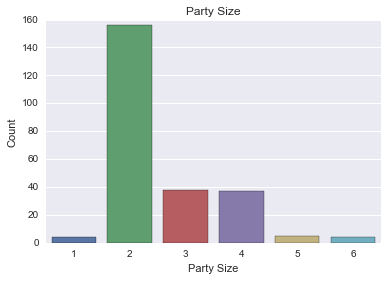

In [31]:
sns.countplot(x="size", data=tips).set(title="Party Size", xlabel="Party Size",ylabel="Count")
pylab.show()

The most popular group size that visit the restaurant is couples, followed by groups of 3 and 4 people.

3..  Multivariate continuos variables, relation between: bill_amont, tips and tip_rate.

       For them we'll calculate:

        a) Scatterplot to visualise realation between variables.
        b) Correlation coeficient to meassure strenght of their linear relation. 

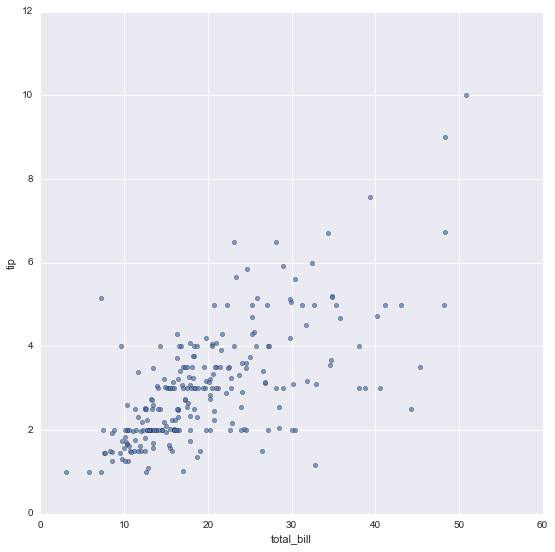

In [25]:
tips.plot(kind="scatter", x="total_bill", y="tip", figsize=(9,9), alpha=0.7)
pylab.show()

In [24]:
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


As it can be seen in the scatterplot and later corroborated by the correlation coefficient of 0.68, there is a strong linear relation between the Bill Amount and the Tip, so one would expect that the bigger the cost of the meal the bigger the tip.

4.. Multivariate categorical variables, relations for example between: Gender by smoking status, Gender by weekly activity and Dinnings services by weekly activity.

        For them we'll calculate:

           a) Cross tabulation to understand how the sample share a pair of levels. We'll show the count% of observations      
              available in each combination of row and column categories.
   
           b) Garph mosaic plots to see their combine distribution.
           
Gender by smoking status distribution:

In [43]:
tips.groupby(['sex', 'smoker']).count()

total_bill  tip  day  time  size
sex    smoker                                  
Female No              54   54   54    54    54
       Yes             33   33   33    33    33
Male   No              97   97   97    97    97
       Yes             60   60   60    60    60

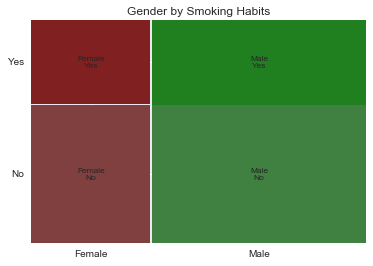

In [28]:
mosaic(tips, ['sex','smoker'], title="Gender by Smoking Habits")
pylab.show()

There is roughly no difference between smokers distribution by gender.

Gender by weekly activity distribution:

In [45]:
tips.groupby(['sex', 'day']).count()

total_bill  tip  smoker  time  size
sex    day                                      
Female Fri            9    9       9     9     9
       Sat           28   28      28    28    28
       Sun           18   18      18    18    18
       Thur          32   32      32    32    32
Male   Fri           10   10      10    10    10
       Sat           59   59      59    59    59
       Sun           58   58      58    58    58
       Thur          30   30      30    30    30

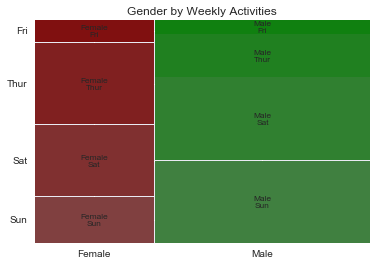

In [46]:
mosaic(tips, ['sex','day'], title="Gender by Weekly Activities")
pylab.show()

During week days, both genders almost equally pay for the meals and tips, during the weekend, males tend to pay more.

Dinning services by weekly activity distribution:

In [51]:
tips.groupby(['time','day']).count()

total_bill  tip  sex  smoker  size
time   day                                     
Dinner Fri           12   12   12      12    12
       Sat           87   87   87      87    87
       Sun           76   76   76      76    76
       Thur           1    1    1       1     1
Lunch  Fri            7    7    7       7     7
       Thur          61   61   61      61    61

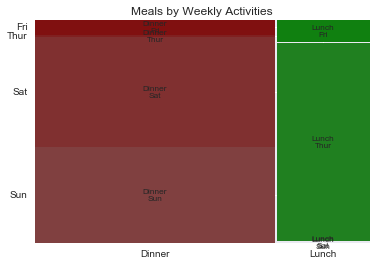

In [52]:
mosaic(tips,['time','day'], title="Meals by Weekly Activities")
pylab.show()

The restaurant is busier during lunch time on Thursdays and has some lunch activity on Fridays; on weekends customers only come for dinner.

5.. For multivariate continuous and categorical variables, relations for example between: tips by gender and smoker status, tips by dinning services and weekly activity and tips by party size and weekly. activity

    For them we'll calculate:

      a) Aggregate tables with combine distributions with statistics such as: mean, median, count, etc.
  
      b) Scatterplot to understand relation between the categorical and numerical variables.

Average tip, total_bill and tip_rate by gender and smoking status:

In [58]:
pd.pivot_table(tips, ['total_bill', 'tip'], ['sex', 'smoker'])

tip  total_bill
sex    smoker                      
Female No      2.773519   18.105185
       Yes     2.931515   17.977879
Male   No      3.113402   19.791237
       Yes     3.051167   22.284500

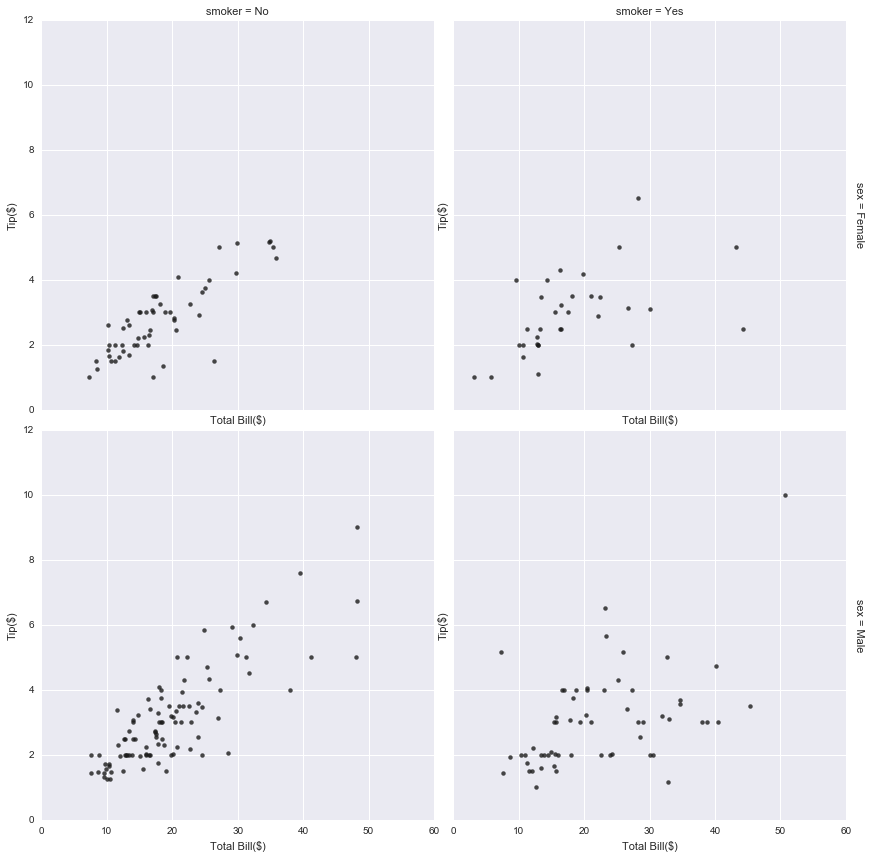

In [59]:
g = sns.FacetGrid(tips, row="sex", col="smoker", margin_titles=True, size=6)
g.map(sns.regplot, "total_bill", "tip", color=".1", fit_reg=False, x_jitter=.1)
g.set(xlabel="Total Bill($)", ylabel="Tip($)")
plt.show()

We can see that even if the average tip rate from smokers is higher than non smokers, the population is more scatter and less reliable giving tips.

Average tip, total_bill and tip_rate by dinning service and weekly activity:

In [60]:
pd.pivot_table(tips, ['total_bill','tip'],['day', 'time'])

tip  total_bill
day  time                        
Fri  Dinner  2.940000   19.663333
     Lunch   2.382857   12.845714
Sat  Dinner  2.993103   20.441379
Sun  Dinner  3.255132   21.410000
Thur Dinner  3.000000   18.780000
     Lunch   2.767705   17.664754

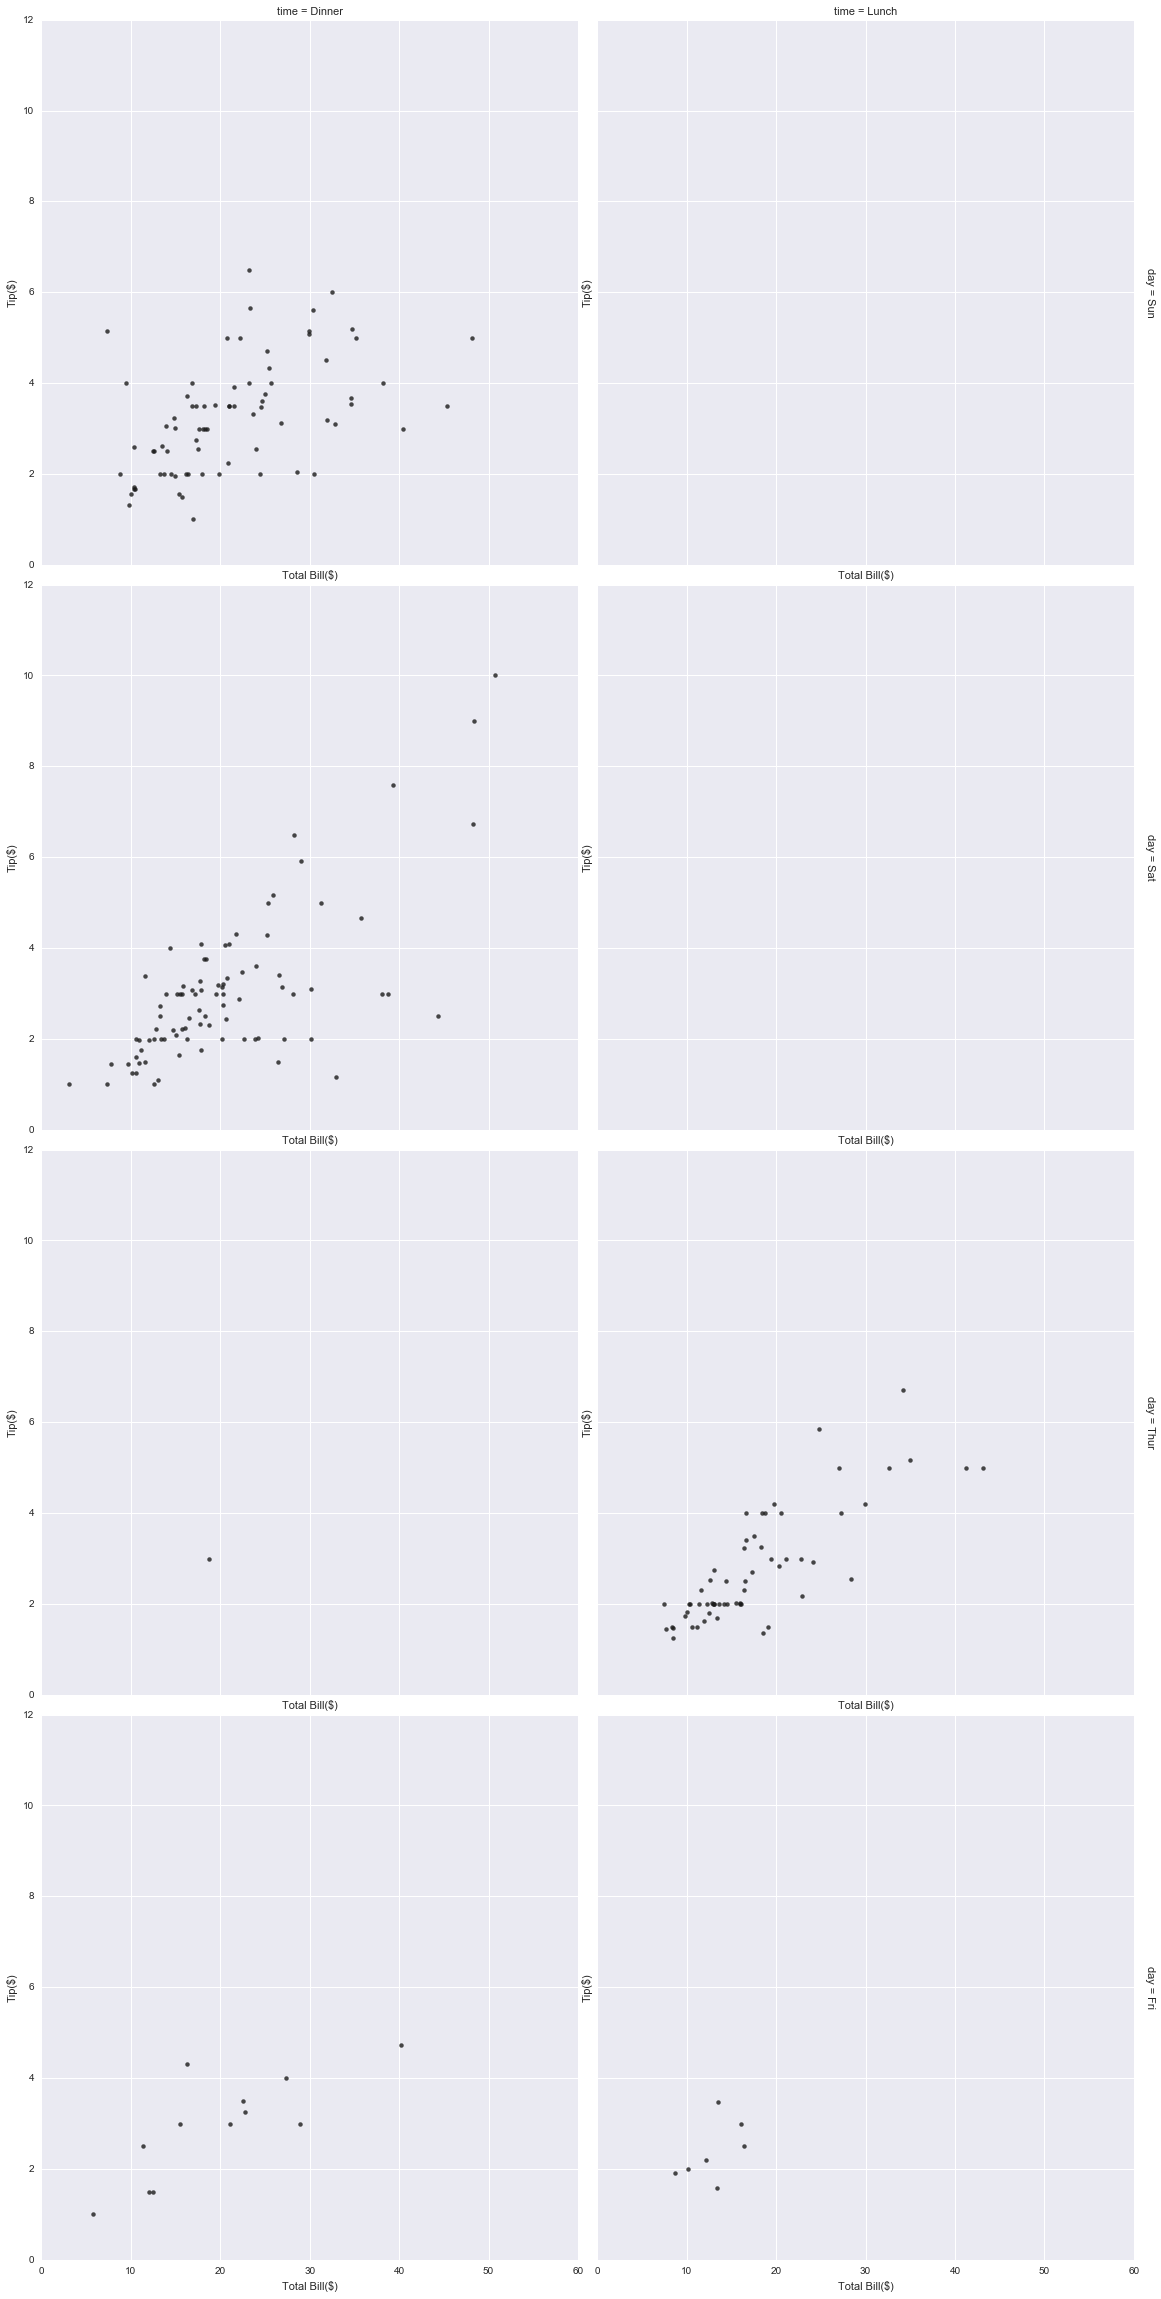

In [61]:
g = sns.FacetGrid(tips, row="day", col="time", margin_titles=True, size=8)
g.map(sns.regplot, "total_bill", "tip", color=".1", fit_reg=False, x_jitter=.1)
g.set(xlabel="Total Bill($)", ylabel="Tip($)")
plt.show()

Higher tips are given during lunch than dinner time.

Average tip, total_bill and tip_rate by party size and weekly activity:

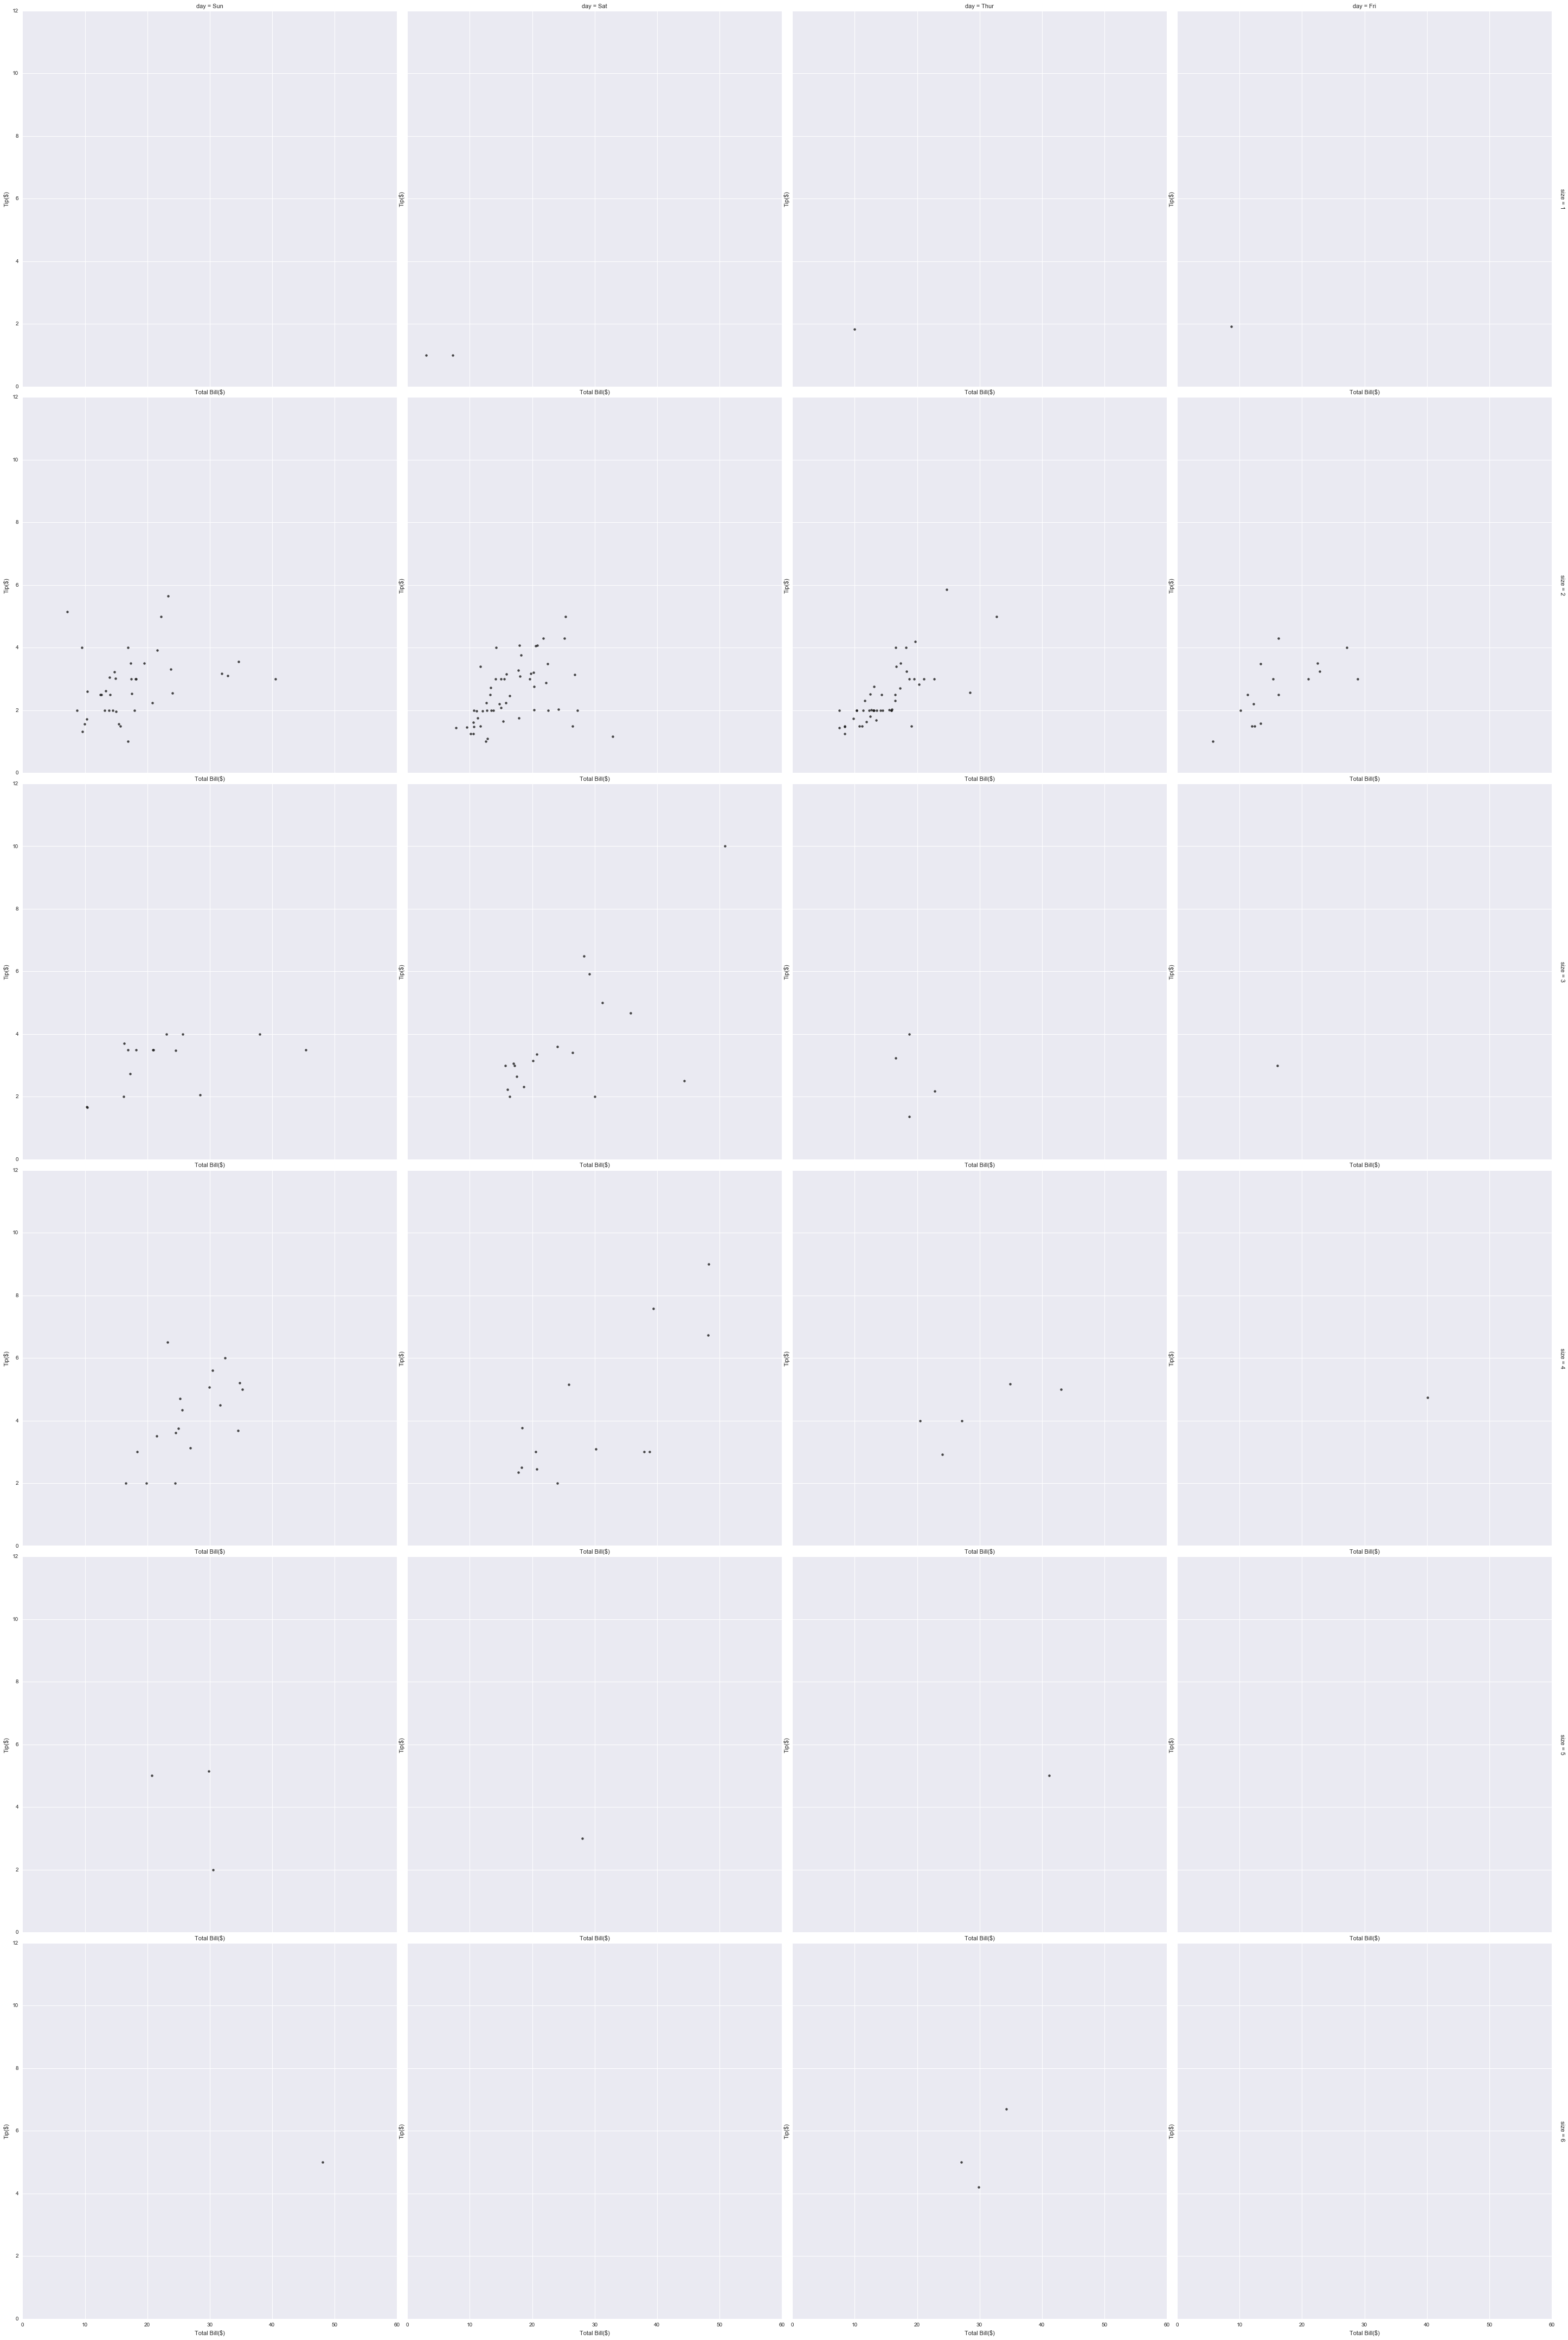

In [34]:
g = sns.FacetGrid(tips, row="size", col="day", margin_titles=True, size=10)
g.map(sns.regplot, "total_bill", "tip", color=".1", fit_reg=False, x_jitter=.1)
g.set(xlabel="Total Bill($)", ylabel="Tip($)")
plt.show()

The most generous group is the couples, with a pretty consistent habit of tipping through out the whole week.

### Observations.
From the above analysis we can observe how the tip rate is influence by the customer gender, smoker status, dinning service, day of the week and finally the party size. At this stage, some of the factors’ influences seem stronger than others like the party size. We recommend as a following step for this analysis, to create a linear regression model with the variable tip rate as the response variable, in order to have a better measure of their influence and predictive capability.


### References.
Bureau of Labor and statistics: http://www.bls.gov/oes/current/oes353031.htm (http://www.bls.gov/oes/current/oes353031.htm)
“Practical Data Analysis: Case Studies in Business Statistics”, Peter Bryant